# Readability Analysis of Job Postings

This notebook analyzes how readable different types of job posts are:
- Real job postings  
- Human-written fake posts  
- AI-refined fake posts  

Understanding readability helps:
- Build trust with clearer language  
- Detect scams using vague/simple text  
- Analyze AI output for unnatural or overly smooth writing

### Readability Metrics Used

- **Flesch Reading Ease**  
  Higher = easier to read  
- **Flesch-Kincaid Grade Level**  
  Grade level needed to understand the text


In [19]:
import pandas as pd
import textstat
import seaborn as sns
import matplotlib.pyplot as plt


# Load datasets
real_jobs = pd.read_csv(
    "../1_datasets/cleaned_data/real_jobs.csv", keep_default_na=False
)
human_fake_jobs = pd.read_csv(
    "../1_datasets/cleaned_data/fake_jobs.csv", keep_default_na=False
)
ai_fake_jobs = pd.read_csv(
    "../1_datasets/cleaned_data/llm_refined_fake_posts2.csv",
    keep_default_na=False,
)

# Label each dataset
real_jobs["label"] = "real"
human_fake_jobs["label"] = "human_fake"
ai_fake_jobs["label"] = "ai_fake"
print(data["label"].value_counts())

# Combine all into one dataframe
data = pd.concat([real_jobs, human_fake_jobs, ai_fake_jobs], ignore_index=True)

label
real          17014
human_fake      866
ai_fake         866
Name: count, dtype: int64



## Apply Readability Metrics

We'll now use the `textstat` library to calculate:

- Flesch Reading Ease
- Flesch-Kincaid Grade Level


In [22]:
# Safe scoring functions
def safe_flesch(text):
    try:
        return textstat.flesch_reading_ease(text)
    except Exception:
        return None


def safe_grade(text):
    try:
        return textstat.flesch_kincaid_grade(text)
    except Exception:
        return None


# Apply readability scores
data["desc_flesch"] = data["description"].apply(safe_flesch)
data["desc_grade"] = data["description"].apply(safe_grade)
data["req_flesch"] = data["requirements"].apply(safe_flesch)
data["req_grade"] = data["requirements"].apply(safe_grade)

data_clean = data.dropna(
    subset=["desc_flesch", "req_flesch", "desc_grade", "req_grade"]
)


## Visualizing the Results

We'll compute average readability scores by job post type.

In [24]:
# Compute average readability scores by label
avg_readability = data_clean.groupby("label").agg({
    "desc_flesch": "mean",
    "req_flesch": "mean",
    "desc_grade": "mean",
    "req_grade": "mean"
}).reset_index().round(2)

# Print it
print(avg_readability)


        label  desc_flesch  req_flesch  desc_grade  req_grade
0     ai_fake        32.79       -0.29       10.78       3.23
1  human_fake        32.79       -0.29       10.78       3.23
2        real        43.82       12.45       10.99       6.58


C:\Users\DELL\AppData\Local\Temp\ipykernel_8908\2506448597.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_readability, x="label",


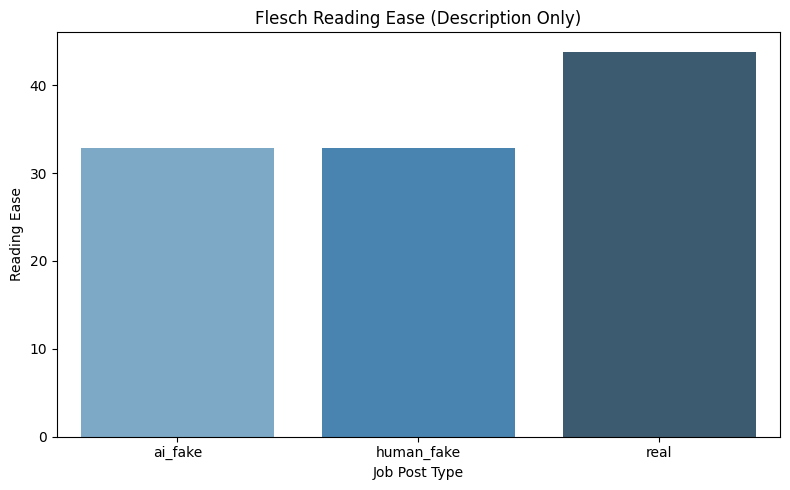

C:\Users\DELL\AppData\Local\Temp\ipykernel_8908\2506448597.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_readability, x="label", y="req_flesch", palette="Greens_d")


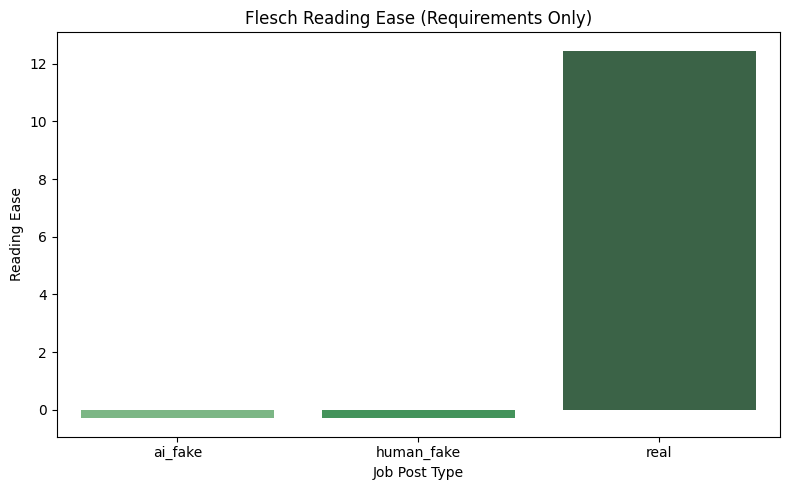

C:\Users\DELL\AppData\Local\Temp\ipykernel_8908\2506448597.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_readability, x="label", y="desc_grade", palette="Reds_d")


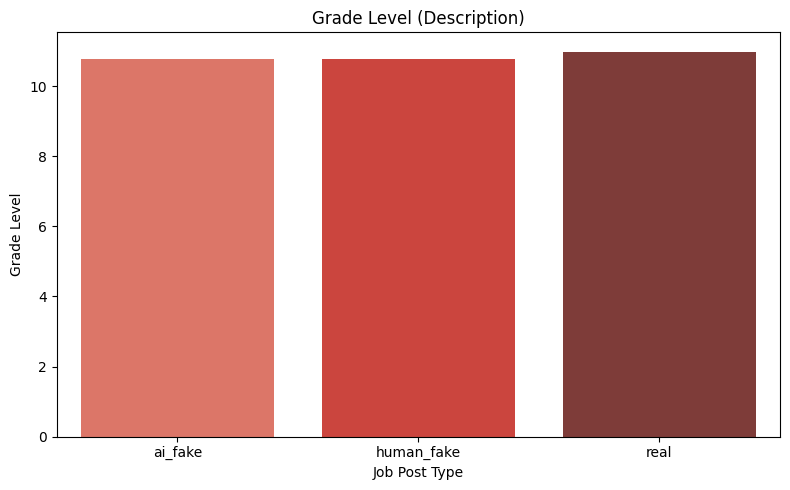

C:\Users\DELL\AppData\Local\Temp\ipykernel_8908\2506448597.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_readability, x="label", y="req_grade", palette="Purples_d")


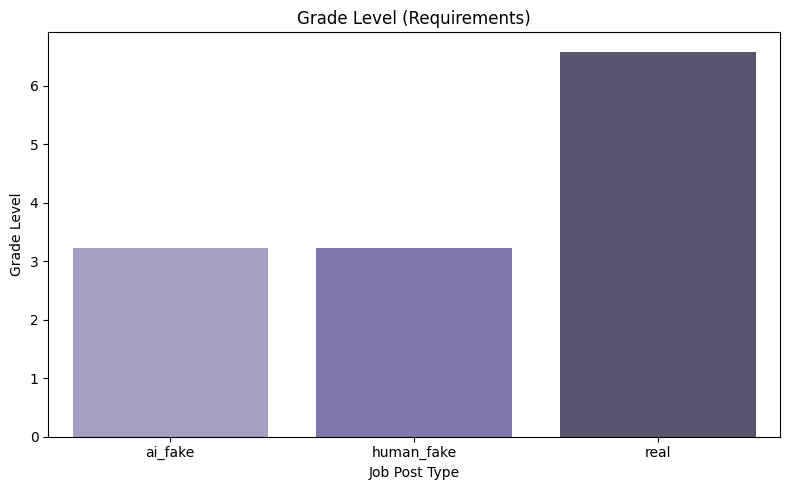

In [32]:
#  Visualization: Flesch (Descriptions)

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_readability, x="label",
            y="desc_flesch", palette="Blues_d")
plt.title("Flesch Reading Ease (Description Only)")
plt.ylabel("Reading Ease")
plt.xlabel("Job Post Type")
plt.tight_layout()
plt.show()

# Visualization: Flesch (Requirements)

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_readability, x="label", y="req_flesch", palette="Greens_d")
plt.title("Flesch Reading Ease (Requirements Only)")
plt.ylabel("Reading Ease")
plt.xlabel("Job Post Type")
plt.tight_layout()
plt.show()

# Visualization: Grade Level (Descriptions)

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_readability, x="label", y="desc_grade", palette="Reds_d")
plt.title("Grade Level (Description)")
plt.ylabel("Grade Level")
plt.xlabel("Job Post Type")
plt.tight_layout()
plt.show()

# Visualization: Grade Level (Requirements)

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_readability, x="label", y="req_grade", palette="Purples_d")
plt.title("Grade Level (Requirements)")
plt.ylabel("Grade Level")
plt.xlabel("Job Post Type")
plt.tight_layout()
plt.show()


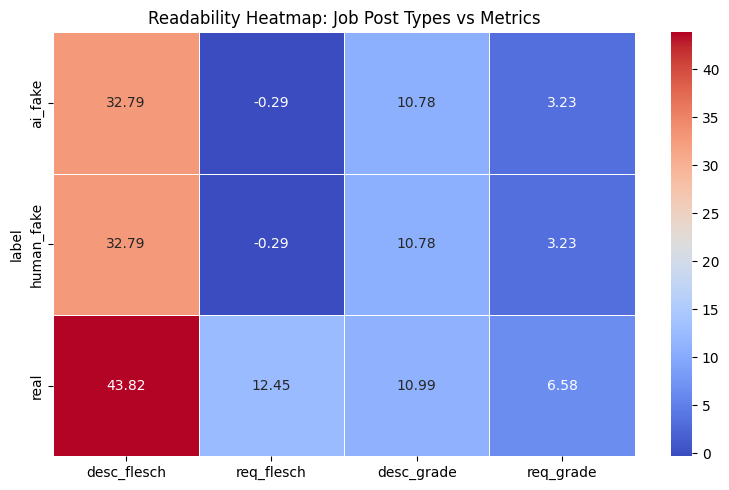

In [29]:
# Heatmap of All Readability Metrics

heatmap_data = avg_readability.set_index("label")
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Readability Heatmap: Job Post Types vs Metrics")
plt.tight_layout()
plt.show()


## 🔍 Breakdown by Job Type

### AI Fake Job Posts

| Metric        | Value | Interpretation                         |
|---------------|--------|----------------------------------------|
| `desc_flesch` | 32.79 | Hard to read                           |
| `req_flesch`  | -0.29 | Very hard / broken writing             |
| `desc_grade`  | 10.78 | High school-level                      |
| `req_grade`   | 3.23  | Very simple or fragmentary             |

---

### Human Fake Job Posts

*Almost identical scores to AI fake jobs, suggesting similar language tone.*

---

### Real Job Posts

| Metric        | Value | Interpretation                         |
|---------------|--------|----------------------------------------|
| `desc_flesch` | 43.82 | Easier to read — clearer communication |
| `req_flesch`  | 12.45 | Still technical but more readable      |
| `desc_grade`  | 10.99 | Late high school or early college      |
| `req_grade`   | 6.58  | Around 6th–7th grade level             |

---

## Observations

### 1. Fake Posts Are Harder to Read Overall  
- AI and human fakes have low Flesch scores (~32.79)  
- Their requirement sections score even worse (−0.29), likely due to bullets, fragments, or incomplete structure  

### 2. Real Job Posts Are More Balanced and Professional  
- `desc_flesch` = 43.82 → clearer, more natural language  
- `desc_grade` = 10.99 → professional tone  
- `req_grade` = 6.58 → simpler and accessible for general readers  

---

## Key Takeaway

> Fake job posts often use **complex or broken language**, especially in the requirements.  
> Real job posts are **more readable** and maintain **clarity across sections**, indicating professional authorship.

---
